<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/kernelized_pca_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-100-2ddf3a647546>:63: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')


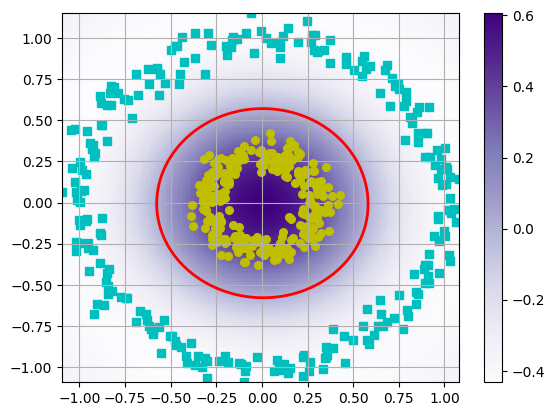

<ipython-input-100-2ddf3a647546>:63: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')


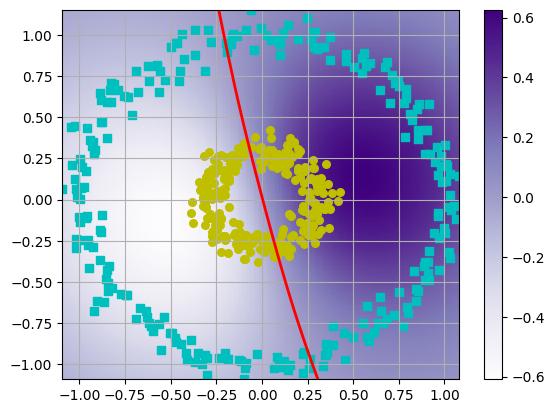

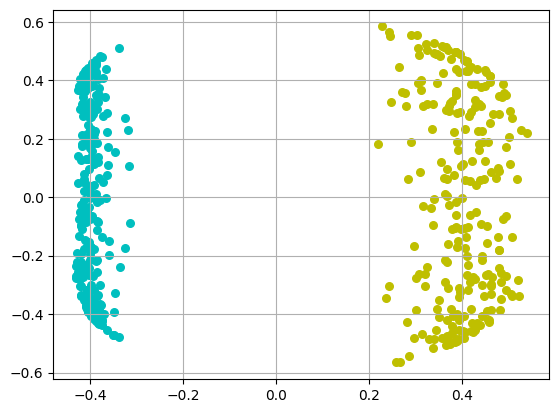

[-0.42986478881288376,
 0.5382440662481282,
 -0.5654378042863765,
 0.5838304449979282]

In [100]:
import numpy as np
from sklearn.svm import LinearSVC as Classifier
import numpy as np
import matplotlib.pyplot as plt
import itertools
from numpy.random import randn #importing randn
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing plotting module
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None:
            conts = list(classes)
        vmin,vmax = classes[0]-eps,classes[-1]+eps
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None:
            conts = sorted([-1+eps,0,1-eps])

    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)
        vmin,vmax=np.min(z)-eps,np.max(z)+eps
        z = np.reshape(z,(npts,npts)).T


        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)

    if Y is not None:
        for i,y in enumerate(classes):
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 30)

    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    if not hold:
        plt.grid()
        plt.show()
    return extent



# Step 1: Create the dataset
from sklearn.datasets import make_circles, make_moons
from sklearn.decomposition import KernelPCA

X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)
#X, y =  make_moons(n_samples=500, noise=0.05, random_state=42)

# Step 2: Apply Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=3).fit(X)
X_kpca = kpca.transform(X)

# Step 3: Define the inverse transform decision function correctly
def inverse_transform_decision_function_1(t):
    """
    This function calculates the projection of points along the second component of
    the kernel PCA-transformed space and returns the second dimension values.
    """
    t_transformed = kpca.transform(t)  # Use the original points without fixing the first dimension
    return t_transformed[:, 1]  # Use the second dimension for contouring

def inverse_transform_decision_function_0(t):
    """
    This function calculates the projection of points along the first component of
    the kernel PCA-transformed space and returns the first dimension values.
    """
    t_transformed = kpca.transform(t)  # Use the original points without fixing the first dimension
    return t_transformed[:, 0]  # Use the first dimension for contouring

# Plot 1: Projection curve in the original feature space

plotit(X,y,clf=inverse_transform_decision_function_0, conts=[0], ccolors=('r',), colors=('c', 'y'), markers=('s', 'o'))
plotit(X,y,clf=inverse_transform_decision_function_1, conts=[0], ccolors=('r',), colors=('c', 'y'), markers=('s', 'o'))
plotit(X_kpca,y, clf=None, conts=[0], ccolors=('r',), colors=('c', 'y'), markers=('o',))

In [80]:
np.min(X_kpca,axis=0)

array([-0.39535567, -0.54204433])

In [81]:
np.max(X_kpca,axis=0)

array([0.47394928, 0.57915402])